# Running basic phi calculation from pyphi

In [1]:
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout
import pandas as pd

import pyphi.data_models as dm  # Prototype code
from pyphi.zap_tc import Zaptc
from pyphi.convert import sbs2sbn, sbn2sbs      

In [2]:
>>> import pyphi
>>> import numpy as np
>>> tpm = np.array([
...     [0, 0, 0],
...     [0, 0, 1],
...     [1, 0, 1],
...     [1, 0, 0],
...     [1, 1, 0],
...     [1, 1, 1],
...     [1, 1, 1],
...     [1, 1, 0]
... ])
>>> cm = np.array([
...     [0, 0, 1],
...     [1, 0, 1],
...     [1, 1, 0]
... ])
>>> labels = ('A', 'B', 'C')
>>> network = pyphi.Network(tpm, cm=cm, node_labels=labels)
>>> state = (1, 0, 0)
# state = (0, 1, 0)  # ERROR
>>> node_indices = (0, 1, 2)
>>> subsystem = pyphi.Subsystem(network, state, node_indices)

>>> pyphi.compute.phi(subsystem) # => 2.3125

2.3125

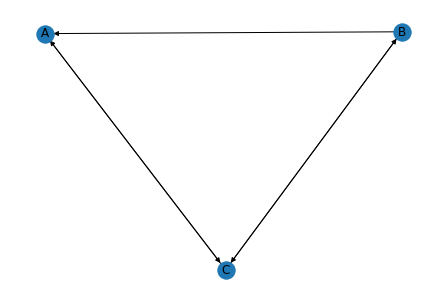

In [3]:
g=nx.from_numpy_array(cm,create_using=nx.DiGraph)
gn = dm.Gnet(g, tpm).draw()

In [4]:
gn.tpm

,A,B,C
000,0,0,0
001,0,0,1
010,1,0,1
011,1,0,0
100,1,1,0
101,1,1,1
110,1,1,1
111,1,1,0


In [5]:
gn.tpm.to_numpy()

array([[0, 0, 0],
       [0, 0, 1],
       [1, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0]])

Computing concepts:   0%|                                | 0/7 [00:00<?, ?it/s]

Calculating Φ at state=[1, 0, 0]


2.3125

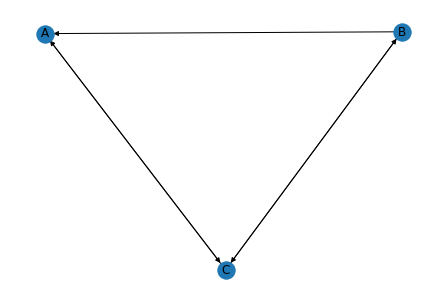

In [6]:
g=nx.from_numpy_array(cm,create_using=nx.DiGraph)
gn = dm.Gnet(g, tpm).draw()
#gn.phi(state=(1,0,0))
gn.phi(statestr='100')

Gathering system state transition counts (time=10) ...
DONE
Calculating Φ at state=[0, 1, 0, 0, 1, 0]


TypeError: __repr__ returned non-string (type tuple)

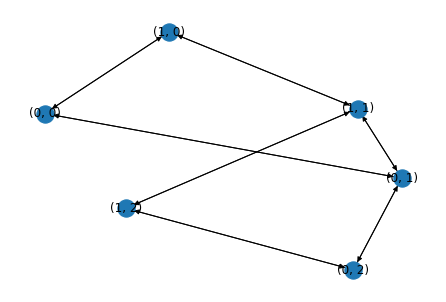

In [7]:
g = nx.grid_2d_graph(2, 3, create_using=nx.DiGraph) # num_nodes, num_does
gn = dm.Gnet(g).draw()  
gn.discover_tpm()
%time gn.phi()

# STOP HERE

In [8]:
# don't go beyond here with Run All
assert False

AssertionError: 

In [ ]:
p = 5  # must be prime for Expander (7 is painfully slow)
g = nx.DiGraph(nx.chordal_cycle_graph(p)) # an Expander graph
gn = dm.Gnet(g).draw()  # RANDOM tpm
gn.discover_tpm()
#print(gn.tpm)

In [ ]:
%time gn.phi()

In [ ]:
g = nx.gnp_random_graph(5, 0.4, directed=True) # num_nodes, prob_edge
gn = dm.Gnet(g).draw()  
gn.discover_tpm()
%time gn.phi()

In [ ]:
g = nx.gnp_random_graph(5, 0.4, directed=True) # num_nodes, prob_edge
gn = dm.Gnet(g).draw()  
gn.discover_tpm()
%time gn.phi()

In [ ]:
gn.graph

In [ ]:
nx.write_gml(gn.graph,'random_5_40.gml')

In [ ]:
print(nx.info(gn.graph))

In [ ]:
gn.tpm.index

In [ ]:
gn.graph